<a href="https://colab.research.google.com/github/irtiqamalik02/DepressionDiagnosis/blob/main/EDA%2BML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




#                        **Sentiment Analysis For Depression**
---



In [ ]:
import pickle
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords
from sklearn.utils import shuffle
import sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
import sklearn.svm as svm
import sklearn.metrics as metrics


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/My Drive/Colab Notebooks')

Mounted at /content/drive


In [ ]:
depressed_pickle = open("/content/drive/My Drive/Colab Notebooks/dep_data/depressed.pickle","rb")
depressed_dict = pickle.load(depressed_pickle)
depressed_df = pd.DataFrame(depressed_dict)
depressed_df.drop_duplicates(subset=['id'], inplace=True)
print("test Total number of comments: ", sum(depressed_df['num_comments']))

test Total number of comments:  121355


In [ ]:
non_depressed_pickle = open("/content/drive/My Drive/Colab Notebooks/dep_data/non_depressed.pickle","rb")
non_depressed_dict = pickle.load(non_depressed_pickle)
non_depressed_df = pd.DataFrame(non_depressed_dict)
non_depressed_df.drop_duplicates(subset=['id'], inplace=True)
print("test Total number of comments: ", sum(non_depressed_df['num_comments']))

test Total number of comments:  178277


In [ ]:
depressed_comments_arr = depressed_df['comments'].tolist()
non_depressed_comments_arr = non_depressed_df['comments'].tolist()

In [ ]:
depressed_comments = [comment for post in depressed_df['comments'] for comment in post]
non_depressed_comments = [comment for post in non_depressed_df['comments'] for comment in post]

In [ ]:
print("depressed length ", len(depressed_comments))
print("non depressed length ", len(non_depressed_comments))

depressed length  116900
non depressed length  127911


In [ ]:
def clean_one_comment(comment):
    comment = comment.lower()
    # remove /r/, /u/, numbers
    comment = re.sub(r"(\/r\/)|(\/u\/)|(\d+)","",comment)
    # remove punctuation
    comment = comment.translate(str.maketrans('','', string.punctuation))
    # replacing ' 
    comment = comment.replace('’','')
    comment = comment.replace('\n'," ")
    # remove trailing whitespace
    comment = comment.strip()
    return comment

In [ ]:
def clean_comments(comments):
    removed_comments = ['[deleted]', '[removed]']
    filtered_comments = [comment for comment in comments if comment not in removed_comments]
    comments_clean = list()
    for comment in filtered_comments:
        comment_new = clean_one_comment(comment)
        comments_clean.append(comment_new)
    return comments_clean

In [ ]:
print('orig length: ', len(depressed_comments))
print(depressed_comments[:10])
depressed_comments_cleaned = clean_comments(depressed_comments)
print('cleaned length: ', len(depressed_comments_cleaned))

orig length:  116900
["Sorry if I'm stupid, but what's activism? I don't want to accidentally break the rules", 'Ah thank you, usually I just see it as a load of horsecrap of people wanting to feel good by repeating lines of comfort words to a person and thinking they did some good not knowing that they made a depressed person lose eveb more hope and reason to live with their plastic character. Some genuinely care but not all.', 'Lol somebody in my town thought that day was a good day for suicide good job. Small town of like 14k citizens 5 suicides under 18 in 1 year. Thinking about joining the club as well.', 'I really appreciate this post. The "activism" and "awareness" days are honestly so triggering for me that I\'d like to pretend they don\'t exist.', 'donate to my mom lol\n\n&#x200B;', '[removed]', '[deleted]', '[deleted]', '[deleted]', "Basically anything that's aimed at raising awreness (or money) among the general public.  Totally out of place in a support community.  Our prob

In [ ]:
non_depressed_comments_cleaned = clean_comments(non_depressed_comments)
print('cleaned length: ', len(non_depressed_comments_cleaned))

cleaned length:  127559


# EXPLORATORY DATA ANALYSIS #

**`Text Statistics Visualizations `**

In [ ]:
# Most frequesntly used word
depressed_df.groupby('label').describe()

text                   
        count  unique   top freq
label                           
1      111962  107348  same  319

In [ ]:
# Length of the depressed messages
depressed_df['length'] = depressed_df['text'].apply(len)
depressed_df.head()

,text,label,length
0,sorry if im stupid but whats activism i dont w...,1,81
1,ah thank you usually i just see it as a load o...,1,314
2,lol somebody in my town thought that day was a...,1,172
3,i really appreciate this post the activism and...,1,135
4,donate to my mom lol xb,1,24


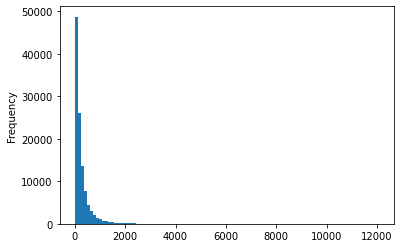

In [ ]:
# Number Of Characters Present In Depressed texts
depressed_df['length'].plot(bins=100, kind='hist') 

In [ ]:
# Length of the non-depressed messages
non_depressed_df['length'] = non_depressed_df['text'].apply(len)
non_depressed_df.head()

,text,label,length
0,his dad developed huntingtons and his mom left...,0,223
1,got back together with him after years apart ...,0,184
2,she met someone like a decade ago and theyve b...,0,137
3,she is a therapist and happily married,0,38
4,she was an exchange student who i was absolute...,0,453


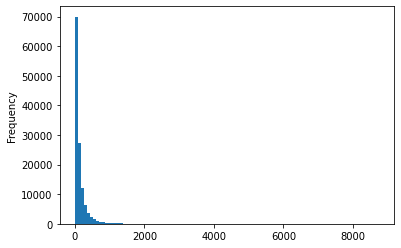

In [ ]:
# Number Of Characters Present In Non-Depressed texts
non_depressed_df['length'].plot(bins=100, kind='hist') 

In [ ]:
# IMPORTING LIBRARIES FOR REMOVING PUNCTUATION
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
# IMPORTING LIBRARIES FOR REMOVING STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

**` Pipeline To Clean Up All The Messages `**


In [ ]:
# The pipeline performs the following:
# (1) remove punctuation
# (2) remove stopwords

def message_cleaning(message):
    Test_punc_removed = [char for char in message if char not in string.punctuation] 
    Test_punc_removed_join = ''.join(Test_punc_removed)
    Test_punc_removed_join_clean = [word for word in Test_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Test_punc_removed_join_clean

In [ ]:
# Testing the newly added function
dep_clean = depressed_df['text'].apply(message_cleaning)

In [ ]:
# Removing stopwards from non depressed data
nondep_clean = non_depressed_df['text'].apply(message_cleaning)

**`Ngram Exploration`**


In [ ]:
# Top N-grams Barchart

import seaborn as sns
import numpy as np
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from collections import  Counter

def plot_top_ngrams_barchart(text, n=2):
    stop=set(stopwords.words('english'))

    new= text.str.split()
    new=new.values.tolist()
    corpus=[word for i in new for word in i]

    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0) 
        words_freq = [(word, sum_words[0, idx]) 
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sns.barplot(x=y,y=x)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


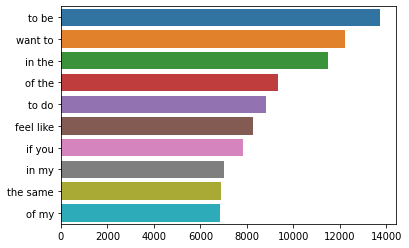

In [ ]:
# Bigram for Depressed data
import nltk
nltk.download('stopwords')
plot_top_ngrams_barchart(depressed_df['text'],2)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


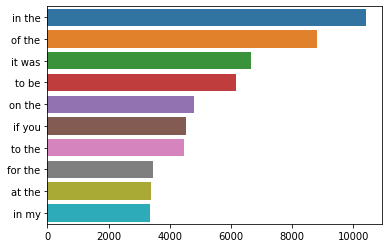

In [ ]:
# Bigram for Non-Depressed Data
import nltk
nltk.download('stopwords')
plot_top_ngrams_barchart(non_depressed_df['text'],2)

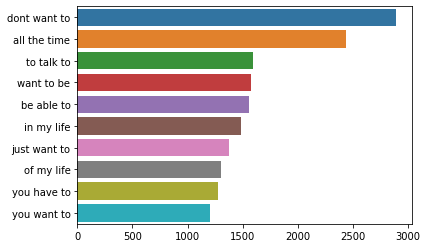

In [ ]:
# Trigram for Depressed data
plot_top_ngrams_barchart(depressed_df['text'],3)

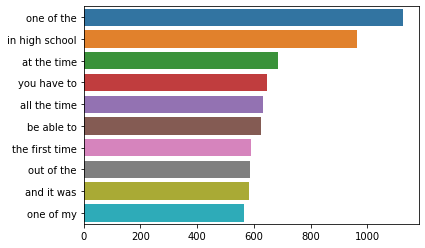

In [ ]:
# Trigram for non depressed data
plot_top_ngrams_barchart(non_depressed_df['text'],3)

In [ ]:
# Wordcloud

import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud, STOPWORDS


def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus
    
    corpus=_preprocess_text(text)
    
    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30, 
        scale=3,
        random_state=1)
    
    wordcloud=wordcloud.generate(str(corpus))

    fig = plt.figure(1, figsize=(12, 12))
    plt.axis('off')
 
    plt.imshow(wordcloud)
    plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


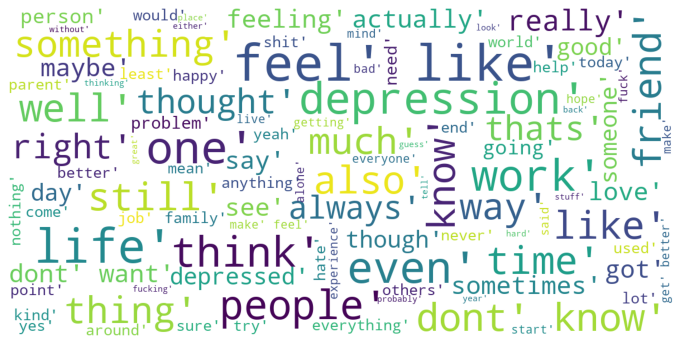

In [ ]:
plot_wordcloud(depressed_df['text'])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


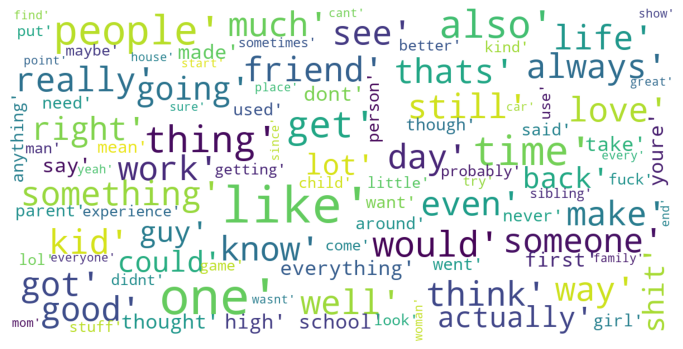

In [ ]:
plot_wordcloud(non_depressed_df['text'])

# ML Models #

In [ ]:
depressed_df = pd.DataFrame(depressed_comments_cleaned)
depressed_df.columns = ['text']
depressed_df['label'] = 1  # here, 1 = depressed, 0 = not depressed
depressed_df

,text,label
0,sorry if im stupid but whats activism i dont w...,1
1,ah thank you usually i just see it as a load o...,1
2,lol somebody in my town thought that day was a...,1
3,i really appreciate this post the activism and...,1
4,donate to my mom lol xb,1
...,...,...
111957,amazon barnes and noble wherever its meant for...,1
111958,bad timing dumb bot,1
111959,i hear i do hear ya see if you have any resour...,1
111960,thx kind internet person its been a while,1


In [ ]:
non_depressed_df = pd.DataFrame(non_depressed_comments_cleaned)
non_depressed_df.columns = ['text']
non_depressed_df['label'] = 0
non_depressed_df

,text,label
0,his dad developed huntingtons and his mom left...,0
1,got back together with him after years apart ...,0
2,she met someone like a decade ago and theyve b...,0
3,she is a therapist and happily married,0
4,she was an exchange student who i was absolute...,0
...,...,...
127554,from a buick is hands down my favorite king n...,0
127555,yes the illustrations were so creepy,0
127556,hell no but i will end up watching it regardless,0
127557,i think its super underrated many king fans ha...,0


In [ ]:
df = pd.concat([depressed_df, non_depressed_df]).reset_index(drop=True)
df

,text,label
0,sorry if im stupid but whats activism i dont w...,1
1,ah thank you usually i just see it as a load o...,1
2,lol somebody in my town thought that day was a...,1
3,i really appreciate this post the activism and...,1
4,donate to my mom lol xb,1
...,...,...
239516,from a buick is hands down my favorite king n...,0
239517,yes the illustrations were so creepy,0
239518,hell no but i will end up watching it regardless,0
239519,i think its super underrated many king fans ha...,0


In [ ]:
df = shuffle(df).reset_index(drop=True)
df

,text,label
0,sit down on the ledge embrace,1
1,to an extent but remember that part of being d...,1
2,i was not expecting it and something about it ...,0
3,what actually happened on the boat chris,0
4,there are no favorites in this house is a tota...,0
...,...,...
239516,i never had a power wheels,0
239517,tony hale is and will always be buster to me w...,0
239518,welcome i think these issues become a little e...,1
239519,my st was yesterday also if you were in the n...,1


In [ ]:
vectorizer = TfidfVectorizer(min_df=2,norm='l2')

In [ ]:
xy, test = train_test_split(df, test_size=0.2)
train, dev = train_test_split(xy, test_size=0.25)

In [ ]:
print(len(train))
print(len(dev))
print(len(test))

143712
47904
47905


In [ ]:
train

,text,label
118931,anxiety isnt always necessarily about worry mi...,1
194515,the obvious answer nostalgia,0
185787,ive heard the gut is responsible for a huge po...,1
41781,new reddit gal here i suppose it depends on wh...,1
150413,i definitely feel ya man i can hardly remember...,1
...,...,...
133833,got off in a school bathroom that was being us...,0
128040,as the oldest of four this is the horrible tru...,0
204323,absolute failure and a peak experience the bot...,0
40546,i think its more common than we are led to bel...,1


In [ ]:
test

,text,label
67349,exactly how ive always felt like an alien,1
90321,i just feel that if my mom got over her depres...,1
160490,this is why i didnt tell my family about my de...,1
131450,do your work as soon as you get home while the...,0
208048,man this one should have more votes im always...,0
...,...,...
50970,wont date people with tattoos,0
193226,i wanna get back into airsoft but the guns and...,0
156909,i moved from toronto to vancouver and laughed ...,0
183329,taco bell is the purest form of love humans wi...,0


In [ ]:
X_train = train['text']
y_train = train['label']
X_dev = dev['text']
y_dev = dev['label']
X_test = test['text']
y_test = test['label']

In [ ]:
Xv_train = vectorizer.fit_transform(X_train)
Xv_dev = vectorizer.transform(X_dev)
Xv_test = vectorizer.transform(X_test)
from sklearn.metrics import confusion_matrix

**Logistic Regression Model**

In [ ]:
C_param = [0.1,0.25,0.3,0.4,0.5,1,10,100]
for c in C_param:
    print("=============================================")
    print("C: ", c)
    lr = LogisticRegression(C=c)
    lr.fit(Xv_train, y_train)
    preds = lr.predict(Xv_dev)
    print("Accuracy ", metrics.accuracy_score(y_dev, preds))
    print("Precision ", metrics.precision_score(y_dev, preds))
    print("Recall ", metrics.recall_score(y_dev, preds))
    print("F1 score ", metrics.f1_score(y_dev, preds))
    print(metrics.classification_report(y_dev, preds))
    print(confusion_matrix(y_dev, preds))


C:  0.1
Accuracy  0.8270499331997327
Precision  0.8456270788495402
Recall  0.7712004282464201
F1 score  0.8067007302676092
              precision    recall  f1-score   support

           0       0.81      0.88      0.84     25487
           1       0.85      0.77      0.81     22417

    accuracy                           0.83     47904
   macro avg       0.83      0.82      0.83     47904
weighted avg       0.83      0.83      0.83     47904

[[22331  3156]
 [ 5129 17288]]
C:  0.25
Accuracy  0.8370699732798931
Precision  0.851081210956271
Recall  0.7900700361332917
F1 score  0.8194415527332454
              precision    recall  f1-score   support

           0       0.83      0.88      0.85     25487
           1       0.85      0.79      0.82     22417

    accuracy                           0.84     47904
   macro avg       0.84      0.83      0.84     47904
weighted avg       0.84      0.84      0.84     47904

[[22388  3099]
 [ 4706 17711]]
C:  0.3
Accuracy  0.8388443553774215
P

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy  0.8425183700734803
Precision  0.8524240557319558
Recall  0.8023821207119597
F1 score  0.8266464451491337
              precision    recall  f1-score   support

           0       0.83      0.88      0.86     25487
           1       0.85      0.80      0.83     22417

    accuracy                           0.84     47904
   macro avg       0.84      0.84      0.84     47904
weighted avg       0.84      0.84      0.84     47904

[[22373  3114]
 [ 4430 17987]]
C:  1


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy  0.8460880093520374
Precision  0.8526157884867804
Recall  0.8113485301333809
F1 score  0.8314704336099111
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     25487
           1       0.85      0.81      0.83     22417

    accuracy                           0.85     47904
   macro avg       0.85      0.84      0.84     47904
weighted avg       0.85      0.85      0.85     47904

[[22343  3144]
 [ 4229 18188]]
C:  10


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy  0.8455243820975283
Precision  0.8399511024584597
Recall  0.8275862068965517
F1 score  0.8337228114326801
              precision    recall  f1-score   support

           0       0.85      0.86      0.86     25487
           1       0.84      0.83      0.83     22417

    accuracy                           0.85     47904
   macro avg       0.85      0.84      0.84     47904
weighted avg       0.85      0.85      0.85     47904

[[21952  3535]
 [ 3865 18552]]
C:  100


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy  0.8382807281229125
Precision  0.8304054054054054
Recall  0.8223669536512468
F1 score  0.8263666315529956
              precision    recall  f1-score   support

           0       0.85      0.85      0.85     25487
           1       0.83      0.82      0.83     22417

    accuracy                           0.84     47904
   macro avg       0.84      0.84      0.84     47904
weighted avg       0.84      0.84      0.84     47904

[[21722  3765]
 [ 3982 18435]]



*Accuracy= 84%* 

**SVM**

In [ ]:

C_param = [0.1,0.25,0.3,0.4,0.5,1,10,100]
for c in C_param:
    print("=======================================================")
    print("C: ", c)
    model = svm.LinearSVC(C=c)
    model.fit(Xv_train, y_train)
    preds = model.predict(Xv_dev)
    print("Acc ", metrics.accuracy_score(y_dev, preds))
    print("Precision ", metrics.precision_score(y_dev, preds))
    print("Recall ", metrics.recall_score(y_dev, preds))
    print("F1 score ", metrics.f1_score(y_dev, preds))
    print(metrics.classification_report(y_dev, preds))
    print(confusion_matrix(y_dev, preds))

C:  0.1
Acc  0.8457748830995324
Precision  0.8543071337639682
Recall  0.8082705089887139
F1 score  0.8306514463851832
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     25487
           1       0.85      0.81      0.83     22417

    accuracy                           0.85     47904
   macro avg       0.85      0.84      0.84     47904
weighted avg       0.85      0.85      0.85     47904

[[22397  3090]
 [ 4298 18119]]
C:  0.25
Acc  0.8476536406145625
Precision  0.8495722543352601
Recall  0.8195565865191595
F1 score  0.8342945370328322
              precision    recall  f1-score   support

           0       0.85      0.87      0.86     25487
           1       0.85      0.82      0.83     22417

    accuracy                           0.85     47904
   macro avg       0.85      0.85      0.85     47904
weighted avg       0.85      0.85      0.85     47904

[[22234  3253]
 [ 4045 18372]]
C:  0.3
Acc  0.8476745156980628
Precision  0.84

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Acc  0.8168837675350702
Precision  0.8069741282339707
Recall  0.8000624526029353
F1 score  0.8035034272658036
              precision    recall  f1-score   support

           0       0.83      0.83      0.83     25487
           1       0.81      0.80      0.80     22417

    accuracy                           0.82     47904
   macro avg       0.82      0.82      0.82     47904
weighted avg       0.82      0.82      0.82     47904

[[21197  4290]
 [ 4482 17935]]


In [ ]:
lr = LogisticRegression(C=1)
lr.fit(Xv_train, y_train)
preds = lr.predict(Xv_test)
print("Acc ", metrics.accuracy_score(y_test, preds))
print("Precision ", metrics.precision_score(y_test, preds))
print("Recall ", metrics.recall_score(y_test, preds))
print("F1 score ", metrics.f1_score(y_test, preds))
print(metrics.classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Acc  0.8472184531886024
Precision  0.8522128060263654
Recall  0.8123962120192092
F1 score  0.8318283127685485
              precision    recall  f1-score   support

           0       0.84      0.88      0.86     25624
           1       0.85      0.81      0.83     22281

    accuracy                           0.85     47905
   macro avg       0.85      0.84      0.85     47905
weighted avg       0.85      0.85      0.85     47905

[[22485  3139]
 [ 4180 18101]]


In [ ]:
model = svm.LinearSVC(C=0.25)
model.fit(Xv_train, y_train)
preds = model.predict(Xv_test)
print("Acc ", metrics.accuracy_score(y_test, preds))
print("Precision ", metrics.precision_score(y_test, preds))
print("Recall ", metrics.recall_score(y_test, preds))
print("F1 score ", metrics.f1_score(y_test, preds))
print(metrics.classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))


Acc  0.8498486588038827
Precision  0.851931330472103
Recall  0.819622099546699
F1 score  0.8354644646247456
              precision    recall  f1-score   support

           0       0.85      0.88      0.86     25624
           1       0.85      0.82      0.84     22281

    accuracy                           0.85     47905
   macro avg       0.85      0.85      0.85     47905
weighted avg       0.85      0.85      0.85     47905

[[22450  3174]
 [ 4019 18262]]


*ACCURACY= 85%*

In [ ]:

from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
model = MultinomialNB()
model.fit(Xv_train,y_train)
preds = model.predict(Xv_test)
#printing the confusion  matrix
print("Acc ", metrics.accuracy_score(y_test, preds))
print("Precision ", metrics.precision_score(y_test, preds))
print("Recall ", metrics.recall_score(y_test, preds))
print("F1 score ", metrics.f1_score(y_test, preds))
print(metrics.classification_report(y_test, preds))
print(confusion_matrix(y_test, preds))

Acc  0.8265108026302056
Precision  0.7753686036426712
Recall  0.8827251918675104
F1 score  0.825571389594308
              precision    recall  f1-score   support

           0       0.88      0.78      0.83     25624
           1       0.78      0.88      0.83     22281

    accuracy                           0.83     47905
   macro avg       0.83      0.83      0.83     47905
weighted avg       0.83      0.83      0.83     47905

[[19926  5698]
 [ 2613 19668]]


*ACCURACY = 83%*

In [ ]:
import seaborn as sn
import matplotlib.pyplot as plt

In [ ]:
cf2 =[[19911 , 5579],
 [ 2701, 19714]]

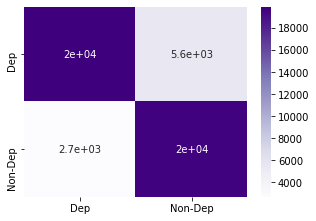

In [ ]:
df_cm = pd.DataFrame(cf2, index = [i for i in ["Dep","Non-Dep"]],
                  columns = [i for i in ["Dep","Non-Dep"]])
plt.figure(figsize = (5,3.5))
sn.heatmap(df_cm, annot=True, cmap="Purples")

In [ ]:
nltk.download("stopwords")
additional_stopwords = "you that him to it her there etc know want one hey hi yep well really hello a like don't about above after again against all am an and any are aren't as at be because been before being below between both but by can't cannot could couldn't did didn't do does doesn't doing don't down during each few for from further had hadn't has hasn't have haven't having he he'd he'll he's her here here's hers herself him himself his how how's i i'd i'll i'm i've if in into is isn't it it's its itself let's me more most mustn't my myself no nor not of off on once only or other oughtour ours ourselves out over own same shan't she she'd she'll she's should shouldn't so some such than that that's the their theirs them themselves then there there's these they they'd they'll they're they've this those through to too under until up very was wasn't we we'd we'll we're we've were weren't what what's when when's where where's which while who who's whom why why's with won't would wouldn't you you'd you'll you're you've your yours yourself yourselves"
removing_words = 'beyondblue beyond blue tony wk tony geoff neil depression'
englishstop = stopwords.words("english")
englishstop += additional_stopwords.split()
englishstop += removing_words.split()
nopunc = re.sub("'",'',additional_stopwords)
englishstop += nopunc.split()
englishstop = set(englishstop)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len([words]))

def pipeline(train1, whatstop):
    train1['LINE_NUM'] = train1['TEXT'].apply(lambda x: str(x).count('\n') - 2)
    train1['WORD_COUNT'] = train1['TEXT'].apply(lambda x: len(str(x).split(" ")))
    train1['CHAR_COUNT'] = train1['TEXT'].str.len() ## this also includes spaces
    train1['TEXT'] = train1['TEXT'].apply(lambda x: re.sub(r'\n',' ',x))
    train1['TEXT'] = train1['TEXT'].str.replace(r'\s+',' ')
    train1['TAG'] = train1['TEXT'].str.contains('@')
    train1['STOPWORDS'] = train1['TEXT'].apply(lambda x: len([x for x in str(x).split() if x in whatstop]))
    train1['HASHTAGS'] = train1['TEXT'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
    train1['UPPER'] = train1['TEXT'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
    train1['NUMERICS'] = train1['TEXT'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
    #train1['AVG_WORDS_LEN'] = train1['TEXT'].apply(lambda x: avg_word(str(x)))
    train1['AVG_WORDS_LEN'] = train1['CHAR_COUNT'] / train1['WORD_COUNT'] # including spaces
    #lexical divercity
    train1['LEXICAL_DIVER'] = train1['TEXT'].apply(lambda x: len(x) / len(set(x)) if len(set(x))>0 else 0 ) 
    return train1

In [ ]:
depressed_df.rename(columns={'text': "TEXT"}, inplace=True)

In [ ]:
non_depressed_df.rename(columns={'text': "TEXT"}, inplace=True)

In [ ]:
depressed_df.head()

,TEXT,label,length
0,sorry if im stupid but whats activism i dont w...,1,81
1,ah thank you usually i just see it as a load o...,1,314
2,lol somebody in my town thought that day was a...,1,172
3,i really appreciate this post the activism and...,1,135
4,donate to my mom lol xb,1,24


In [ ]:
dep = pipeline(depressed_df, englishstop)

In [ ]:
nondep = pipeline(non_depressed_df, englishstop)

In [ ]:
dep.head()

,TEXT,label,length,LINE_NUM,WORD_COUNT,CHAR_COUNT,TAG,STOPWORDS,HASHTAGS,UPPER,NUMERICS,AVG_WORDS_LEN,LEXICAL_DIVER
0,sorry if im stupid but whats activism i dont w...,1,81,-2,15,81,False,9,0,0,0,5.400000,3.681818
1,ah thank you usually i just see it as a load o...,1,314,-2,60,314,False,30,0,0,0,5.233333,13.083333
2,lol somebody in my town thought that day was a...,1,172,-2,36,172,False,14,0,0,0,4.777778,7.347826
3,i really appreciate this post the activism and...,1,135,-2,24,135,False,15,0,0,0,5.625000,6.136364
4,donate to my mom lol xb,1,24,-2,7,24,False,2,0,0,0,3.428571,1.916667


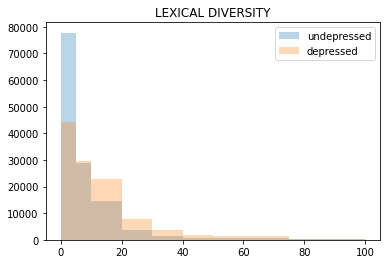

In [ ]:
plt.hist(nondep['LEXICAL_DIVER'],label = 'undepressed',alpha = 0.3, bins=[0,5,10,20,30,40,50,75,100])
plt.hist(dep['LEXICAL_DIVER'],label = 'depressed',alpha = 0.3, bins=[0,5,10,20,30,40,50,75,100])
plt.title('LEXICAL DIVERSITY')
plt.legend()
plt.show()

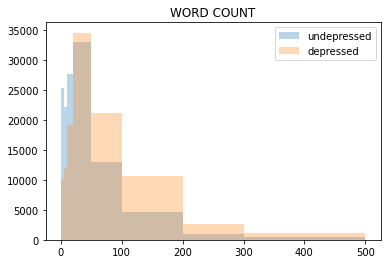

In [ ]:
plt.hist(nondep['WORD_COUNT'],label = 'undepressed',alpha = 0.3, bins=[0,5,10,20,50,100,200,300,500])
plt.hist(dep['WORD_COUNT'],label = 'depressed',alpha = 0.3, bins=[0,5,10,20,50,100,200,300,500])
plt.title('WORD COUNT')
plt.legend()
plt.show()

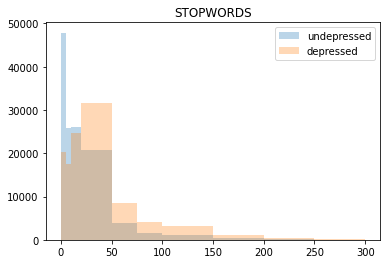

In [ ]:
plt.hist(nondep['STOPWORDS'],label = 'undepressed',alpha = 0.3, bins=[0,5,10,20,50,75,100,150,200,250,300])
plt.hist(dep['STOPWORDS'],label = 'depressed',alpha = 0.3, bins=[0,5,10,20,50,75,100,150,200,250,300])
plt.title('STOPWORDS')
plt.legend()
plt.show()

In [ ]:
def cleanpipe(train1,whatstop):
    train1['WORKING_TEXT'] = train1['TEXT'].apply(lambda x: " ".join(x.lower() for x in str(x).split()))
    train1['WORKING_TEXT'] = train1['WORKING_TEXT'].str.replace(r'\d+',' ')
    train1['WORKING_TEXT'] = train1['WORKING_TEXT'].str.replace(r'[^\w\s]',' ')
    train1['WORKING_TEXT'] = train1['WORKING_TEXT'].str.replace(r'\s+',' ')
    train1['WORKING_TEXT'] = train1['WORKING_TEXT'].apply(lambda x:" ".join(x for x in x.split() if (x not in whatstop)))
   
    #removing links, and words under 2 chars
    train1['WORKING_TEXT'] = train1['WORKING_TEXT'].apply(lambda x: " ".join(x for x in x.split() if not(x.startswith('www'))))
    train1['WORKING_TEXT'] = train1['WORKING_TEXT'].apply(lambda x: " ".join(x for x in x.split() if not(x.startswith('http'))))                
    train1['WORKING_TEXT'] = train1['WORKING_TEXT'].apply(lambda x: " ".join(x for x in x.split() if not(len(x)< 2)))                

    #removing posts less then 8 words
    train1.drop(train1[train1['WORD_COUNT'] < 8].index,inplace = True)
    
    
    train1 = train1.drop_duplicates(subset = 'WORKING_TEXT')
    return train1


def freqremovel(train1, freq):
    train1['WORKING_TEXT'] = train1['WORKING_TEXT'].apply(lambda x: " ".join(x for x in x.split() if x in freq))
    return train1

In [ ]:
dep = cleanpipe(dep,englishstop)
nondep = cleanpipe(nondep,englishstop)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
dep.head()

,TEXT,label,length,LINE_NUM,WORD_COUNT,CHAR_COUNT,TAG,STOPWORDS,HASHTAGS,UPPER,NUMERICS,AVG_WORDS_LEN,LEXICAL_DIVER,WORKING_TEXT
0,sorry if im stupid but whats activism i dont w...,1,81,-2,15,81,False,9,0,0,0,5.400000,3.681818,sorry stupid activism accidentally break rules
1,ah thank you usually i just see it as a load o...,1,314,-2,60,314,False,30,0,0,0,5.233333,13.083333,ah thank usually see load horsecrap people wan...
2,lol somebody in my town thought that day was a...,1,172,-2,36,172,False,14,0,0,0,4.777778,7.347826,lol somebody town thought day good day suicide...
3,i really appreciate this post the activism and...,1,135,-2,24,135,False,15,0,0,0,5.625000,6.136364,appreciate post activism awareness days honest...
5,basically anything thats aimed at raising awre...,1,300,-2,54,300,False,24,0,0,0,5.555556,12.375000,basically anything aimed raising awreness mone...


In [ ]:
nondep.head()

,TEXT,label,length,LINE_NUM,WORD_COUNT,CHAR_COUNT,TAG,STOPWORDS,HASHTAGS,UPPER,NUMERICS,AVG_WORDS_LEN,LEXICAL_DIVER,WORKING_TEXT
0,his dad developed huntingtons and his mom left...,0,223,-2,49,223,False,24,0,0,0,4.551020,9.608696,dad developed huntingtons mom left family resu...
1,got back together with him after years apart w...,0,184,-2,41,184,False,21,0,0,0,4.487805,8.181818,got back together years apart wonderful years ...
2,she met someone like a decade ago and theyve b...,0,137,-2,28,137,False,16,0,0,0,4.892857,5.956522,met someone decade ago married many years good...
4,she was an exchange student who i was absolute...,0,453,-2,91,453,False,55,0,0,0,4.978022,18.875000,exchange student absolutely moon dates think f...
5,she died far too young i taught hockey in cana...,0,883,-2,190,883,False,102,0,0,0,4.647368,36.250000,died far young taught hockey canada american m...


In [ ]:
englishfreq = pd.Series(' '.join(dep['WORKING_TEXT']).split()).value_counts()[220:-600]
newenglish = freqremovel(dep,englishfreq)

neutral_freq = pd.Series(' '.join(nondep['WORKING_TEXT']).split()).value_counts()[150:-200]
neutral_post = freqremovel(nondep,neutral_freq)

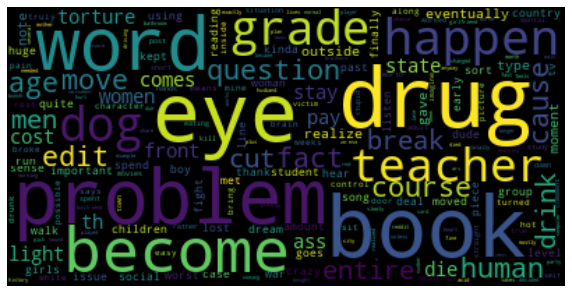

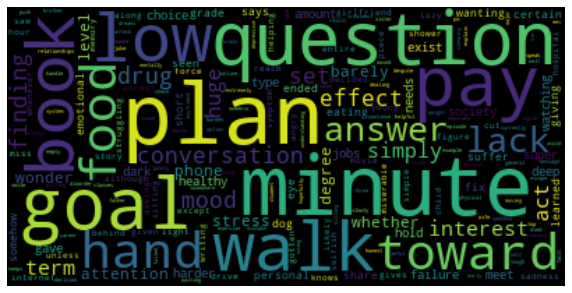

In [ ]:
from wordcloud import WordCloud

def PostWordCloud(df):
    string = ''
    for line in df['WORKING_TEXT']:
        string = string + str(line)
    wordcloud = WordCloud(background_color='black',max_font_size=60, collocations=False).generate(string)
    plt.figure(figsize=(10,10))
    
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

PostWordCloud(neutral_post)
PostWordCloud(newenglish)